<a href="https://colab.research.google.com/github/Omowumieru/FDSfE_OErukubami/blob/main/HW3/Spatial%20Data%20Analysis%20of%20COVID19%20Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Spatial Data Analysis - GEOG271**## 

> **By Emmanuel Chinkaka**

> **University of Delaware**

> **Department of Geography and Spatial Sciences**











In this notebook, we will learn an easy way to analysing Geographic data. The python libraries required are :

> pandas

> matplotlib

> geopandas

We know that pandas and matplotlib are commmonly used python libraries for data analysis and plotting graphs. Now lets see what is geopandas?

**GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by 'pandas' to allow spatial operations on geometric types. Geometric operations are performed by 'shapely'. Geopandas further depends on 'fiona' for file access and 'descartes' and 'matplotlib' for plotting. More details can be found here**

How to install geopandas : pip install geopandas




> **A shapefile** is a simple, nontopological format for storing the geometric location and attribute information of geographic features. Geographic features in a shapefile can be represented by points, lines, or polygons (areas)



**The assignment is about analyzing COVID 19 data and its related variables**

In [56]:
!pip install geopandas -q


In [57]:
!pip install geoplot -q

In [58]:
##Install and import all the required packages in Python packages for the Python Project.
import geoplot as gplt
import geopandas as gpd

In [59]:
import geoplot.crs as gcrs
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import imageio

**1. Connect the notbook to your class google drive**

In [60]:
#connecting to the google drive and getting the data

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Read spatial data as shapefile- Karnataka Districts
Kar = gpd.read_file("/content/drive/MyDrive/W23-GEOG271/COVID Modelling/Kar_Districts/Karnataka_dist_final.shp")
Kar.head()

,KeyID,OBJECTID,Shape_Leng,Shape_Area,Dist_numbe,Dist_Name,Cases,Population,Elderly,NDVI,geometry
0,1,0,7.209818e+09,7.209818e+09,17,Chikkamagaluru,10098.0,44555.0,589.0,0.20,"POLYGON ((646368.928 1501649.279, 646419.356 1..."
1,1,0,4.251288e+09,4.251288e+09,29,Chikkaballapura,345.0,6778.0,123.0,0.69,"POLYGON ((845727.186 1501783.909, 846421.234 1..."
2,1,0,5.639345e+09,5.639345e+09,27,Chamarajanagara,56.0,456.0,12.0,0.56,"POLYGON ((752250.808 1361335.689, 752225.480 1..."
3,1,0,5.453491e+09,5.453491e+09,5,Bidar,777.0,8900.0,455.0,0.50,"MULTIPOLYGON (((767717.940 1968293.755, 767760..."
4,1,0,2.195914e+09,2.195914e+09,20,Bengaluru (Urban),875.0,990.0,34.0,0.69,"MULTIPOLYGON (((777128.955 1415825.254, 777114..."


In [62]:
Kar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KeyID       30 non-null     int64   
 1   OBJECTID    30 non-null     int64   
 2   Shape_Leng  30 non-null     float64 
 3   Shape_Area  30 non-null     float64 
 4   Dist_numbe  30 non-null     int64   
 5   Dist_Name   30 non-null     object  
 6   Cases       30 non-null     float64 
 7   Population  30 non-null     float64 
 8   Elderly     30 non-null     float64 
 9   NDVI        30 non-null     float64 
 10  geometry    30 non-null     geometry
dtypes: float64(6), geometry(1), int64(3), object(1)
memory usage: 2.7+ KB


**2. Determine the shape of the data set loaded above**

In [63]:
Kar.shape

(30, 11)

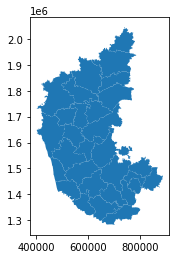

In [64]:
# Plotting the data with Basic plot,
Kar.plot()

**3. Display the district with name called Bidar ***

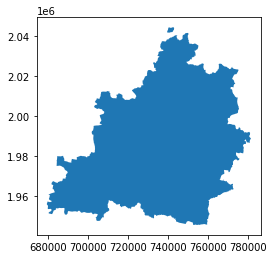

In [65]:
# Individual district plot
Bidar = Kar.query("Dist_Name == 'Bidar'")
Bidar.plot()

**4. Displaying the District and thier corresponding names**

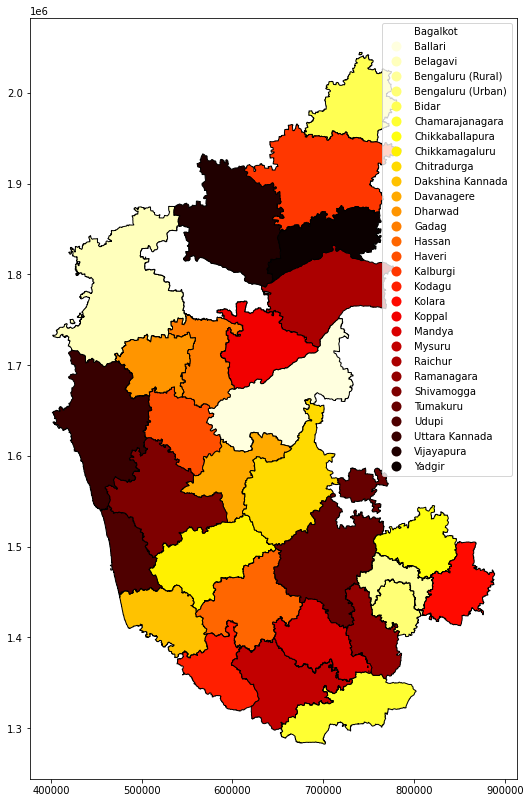

In [66]:
## Standard Map layout with legend

ax = Kar.plot(column = Kar.Dist_Name,
            cmap = 'hot_r',
            figsize =(25,14),
            legend = True,
            edgecolor = 'black')
             

**5. Displaying the spatial prevelence of COVID 19 Cases per district**

Text(0.5, 1.0, 'Total COVID19 Cases in Karnataka, Cases in 2020')

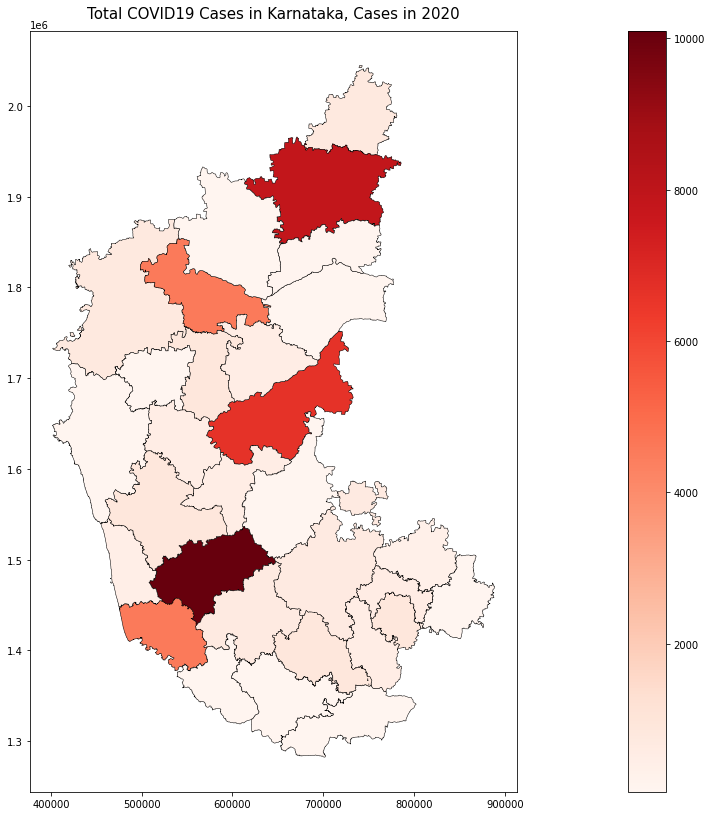

In [67]:
#  Resize figure and adjusting Map layout the axes
ax = Kar.plot(column =('Cases'),
                 cmap = 'Reds',
                 figsize =(40,14),
                 legend = True,
                 edgecolor = 'black',
                 linewidth = 0.5)
ax.set_title ('Total COVID19 Cases in Karnataka, '+ (('Cases') + ' in 2020'), fontdict= 
                 {'fontsize': 15}, pad = 12.5)


**5. Provide two districts that have high COVID 19 Cases**

In [68]:
Kar.nlargest(2, 'Cases')

,KeyID,OBJECTID,Shape_Leng,Shape_Area,Dist_numbe,Dist_Name,Cases,Population,Elderly,NDVI,geometry
0,1,0,7.209818e+09,7.209818e+09,17,Chikkamagaluru,10098.0,44555.0,589.0,0.20,"POLYGON ((646368.928 1501649.279, 646419.356 1..."
9,1,0,1.097246e+10,1.097246e+10,4,Kalburgi,7889.0,30567.0,3456.0,0.24,"MULTIPOLYGON (((684263.118 1855091.336, 684402..."


**6. Is COVID 19 a continuous or discountinous variable? Explain your answer**




Covid 19 is a continuous variable because its values are not fixed but infinite.

**7. Is spatial interpolation the best method for analysing point data for COVID 19 Cases? Explain.**

Spatial interpolation is not the best method for analysing point data for COVID 19 cases because there is no possibilty od predicting or determining the affacted population based a single or multiple known value(s) at a particular location.

**8. Display the spatial distribution of population in the area**

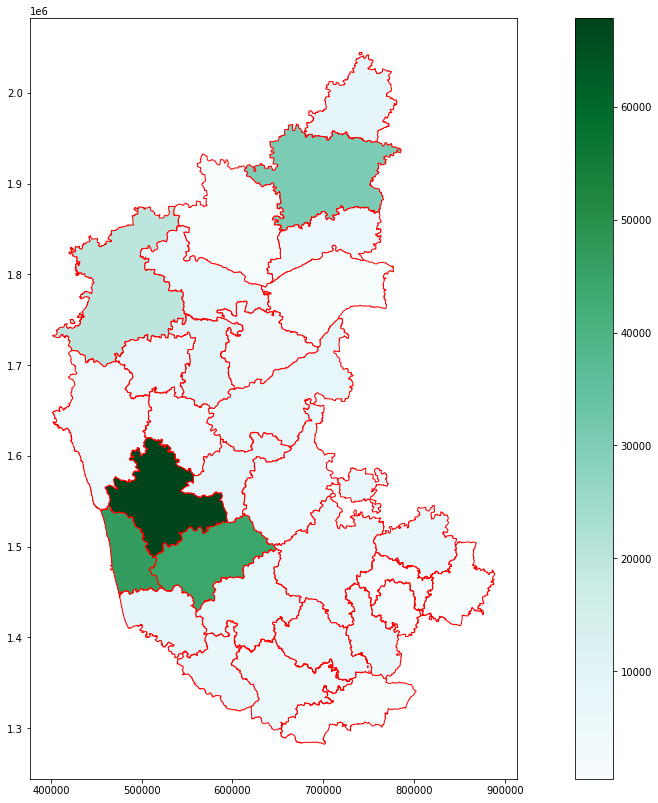

In [69]:
#  Displapying spatial distribution of population

# Kar['Population'].plot()

pop = Kar.plot(column = Kar.Population,
            cmap = 'BuGn',
            figsize =(21,14),
            legend = True,
            edgecolor = 'red')

**8. Determine the spatial relationship between COVID 19 Cases, NDVI, Population and number of the elderly people in the area** 

[]

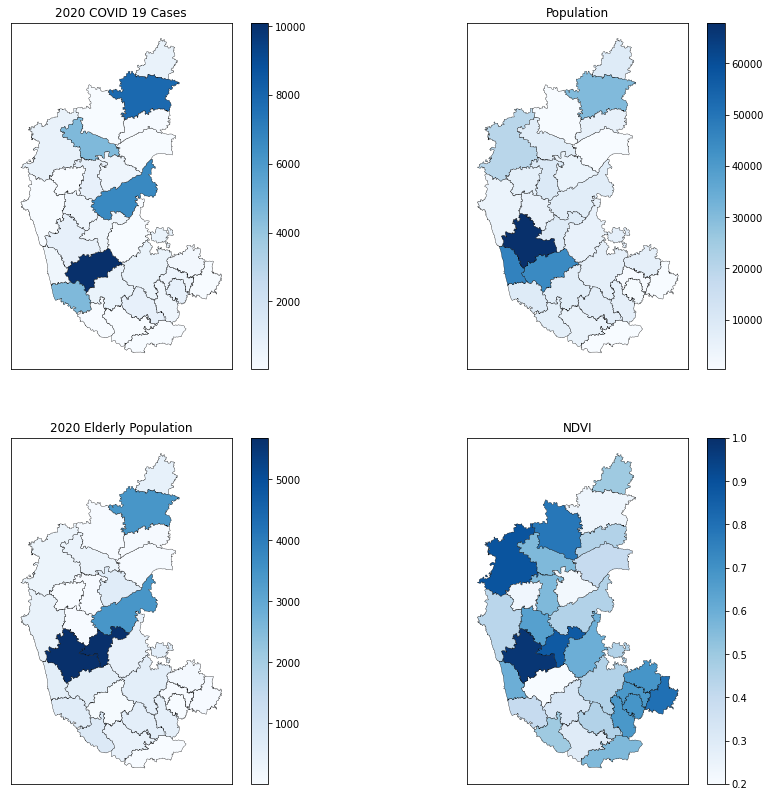

In [70]:
#  Plotting the variable side by side

fig, ax = plt.subplots(2, 2, figsize=(15, 14))
Kar.plot('Cases', ax=ax[0,0], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True)
ax[0,0].set_title("2020 COVID 19 Cases")
Kar.plot('Population', ax=ax[0,1], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True)
ax[0,1].set_title("Population")
Kar.plot('Elderly', ax=ax[1,0], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True)
ax[1,0].set_title("2020 Elderly Population")
Kar.plot('NDVI', ax=ax[1,1], cmap = 'Blues', edgecolor = 'black', linewidth = 0.3, legend=True, vmax=1)
ax[1,1].set_title("NDVI")

ax[0,0].set_yticks([])
ax[0,1].set_yticks([])
ax[1,0].set_yticks([])
ax[1,1].set_yticks([])
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[1,0].set_xticks([])
ax[1,1].set_xticks([])
     

**9. Determining the number of COVID Cases per square foot by census tract** 

In [71]:
#Number of cases per sq foot by census tract
from shapely.geometry import Polygon, LineString, Point

print(Kar.crs)

#EPSG:4326 has lat and lon in degree. Lets change it to Feet
s = Kar.to_crs("EPSG:6565")
print(s.crs)
#calculating area and adding it to the orighical geodataframe
Kar["area_ft"] = s.area

#tree density
Kar["cases_density"] = Kar["Cases"]/Kar["area_ft"]
# print(Kar["cases_density"])

epsg:32643
EPSG:6565


**10. Plot the Histogram of COVID19 Cases per district, using the 'cases_density' variable created above**

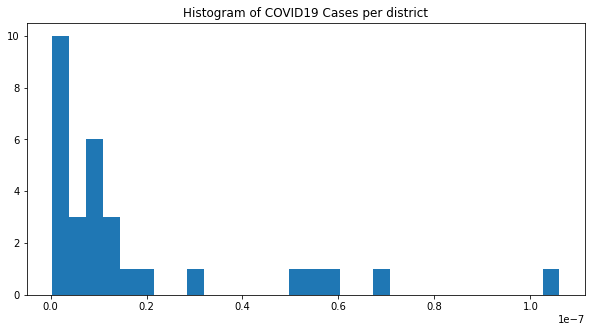

In [72]:
#plotting histogram

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(Kar["cases_density"], bins=30)
ax.set_title("Histogram of COVID19 Cases per district")
plt.show()

**11. Determine the spatial correlation between variables 'Population', 'Cases', 'Elderly', 'NDVI','geometry' using Correlation matrix**

In [73]:
#Clipping the variables that will be used in the modelling based on the influence in the modelling
Kar_subset = Kar[["Population", "Cases", "Elderly", "NDVI", "geometry"]]
Kar_subset.head()

,Population,Cases,Elderly,NDVI,geometry
0,44555.0,10098.0,589.0,0.20,"POLYGON ((646368.928 1501649.279, 646419.356 1..."
1,6778.0,345.0,123.0,0.69,"POLYGON ((845727.186 1501783.909, 846421.234 1..."
2,456.0,56.0,12.0,0.56,"POLYGON ((752250.808 1361335.689, 752225.480 1..."
3,8900.0,777.0,455.0,0.50,"MULTIPOLYGON (((767717.940 1968293.755, 767760..."
4,990.0,875.0,34.0,0.69,"MULTIPOLYGON (((777128.955 1415825.254, 777114..."


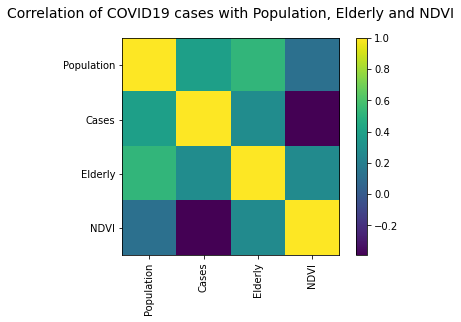

In [74]:
#Running the correction model
plt.imshow(Kar_subset.corr())
plt.xticks(range(len(Kar_subset.corr())), Kar_subset.corr().columns, rotation='vertical')
plt.yticks(range(len(Kar_subset.corr())), Kar_subset.corr().columns)
plt.title("Correlation of COVID19 cases with Population, Elderly and NDVI", fontsize = 14, pad=20)
plt.colorbar();

**12. Explain the Correlation Matrix above, between NDVI and COVID 19 Cases**

NDVI and COVID 19 cases are weakly correlated because the higher the NDVI, the lower the number of cases.